In [1]:
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from utils_all import *

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Model building II: Feature importance, models with fair splitting

In this notebook we will perform: 
* Feture importance with Random forest and XGBoost
* Fair cross validation in terms of domain names (they don't intersect in train and test)
* Model building and comparison

In [6]:
%store -r DATA_NUM_CL_WITH_NAN_TXT_XY

In [7]:
data = DATA_NUM_CL_WITH_NAN_TXT_XY

Construct numeric dataset

In [8]:
data['domain'] = data.url.apply(get_domain)

data_num = data.select_dtypes(['int64', 'float64'])
data_num = data_num.fillna(data_num.mean())
data_num['meta_name'] = data.meta_name
data_num['domain'] = data.domain

### Fair train test split function

the function analyse(...) use fair split on training and testin such that we use one domains for training and other domains for testing => on testing stage the classifier doesn't know about the visual templates of training samples.

See utils_all.py for all functions

# Random Forest classifier

### Name event component

Current model: Random Forest, Prameter optimization: False
1/5 iteration ...
Mean accuracy 0.8607
2/5 iteration ...
Mean accuracy 0.8459
3/5 iteration ...
Mean accuracy 0.8308
4/5 iteration ...
Mean accuracy 0.8440
5/5 iteration ...
Mean accuracy 0.8109
The final CV=5 score for name and Random Forest: 0.8385
METRICS:
   f1_score  mean_accuracy  precision   recall
0  0.829973       0.838479   0.840127  0.82927
Feature importance:
Feature ranking:
7. feature 'font_family' (0.212241)
8. feature 'font_size' (0.100718)
1. feature 'block_width' (0.087021)
21. feature 'tag' (0.057036)
26. feature 'x_coords' (0.053096)
27. feature 'y_center' (0.051404)
28. feature 'y_coords' (0.048128)
0. feature 'block_height' (0.037405)
25. feature 'x_center' (0.035485)
15. feature 'num_upper' (0.035482)
23. feature 'text_len' (0.034132)
24. feature 'width' (0.026008)
11. feature 'line_height' (0.025542)
4. feature 'color_r' (0.022188)
2. feature 'color_b' (0.021537)
3. feature 'color_g' (0.021152)
14. featu

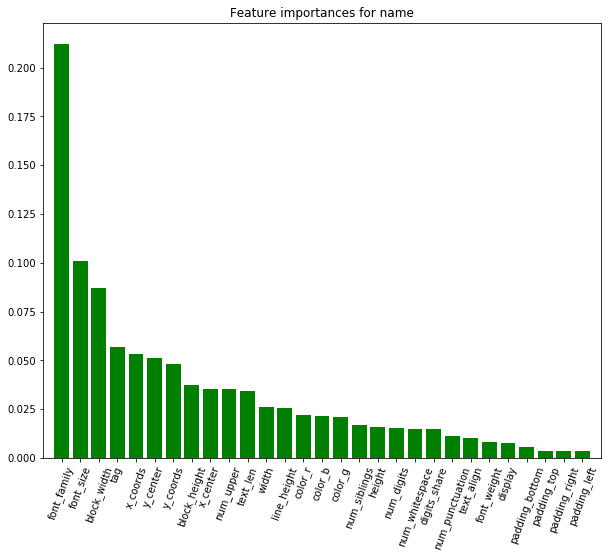

In [7]:
result_name = analyse("name", data_num, "Random Forest")

### Location event component


Current model: Random Forest, Prameter optimization: False
1/5 iteration ...
Mean accuracy 0.8045
2/5 iteration ...
Mean accuracy 0.7611
3/5 iteration ...
Mean accuracy 0.8516
4/5 iteration ...
Mean accuracy 0.8292
5/5 iteration ...
Mean accuracy 0.8692
The final CV=5 score for location and Random Forest: 0.8231
METRICS:
   f1_score  mean_accuracy  precision    recall
0   0.83369        0.82312     0.8087  0.869654
Feature importance:
Feature ranking:
15. feature 'num_upper' (0.121373)
7. feature 'font_family' (0.119330)
21. feature 'tag' (0.099534)
23. feature 'text_len' (0.059737)
14. feature 'num_siblings' (0.051619)
8. feature 'font_size' (0.043039)
16. feature 'num_whitespace' (0.042302)
2. feature 'color_b' (0.040222)
1. feature 'block_width' (0.035264)
9. feature 'font_weight' (0.033890)
5. feature 'digits_share' (0.031112)
13. feature 'num_punctuation' (0.029649)
27. feature 'y_center' (0.026365)
11. feature 'line_height' (0.026341)
28. feature 'y_coords' (0.025467)
3. feature 

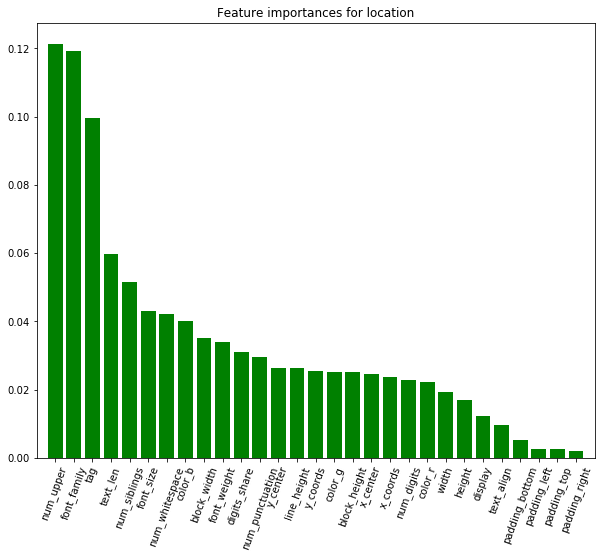

In [8]:
result_location = analyse("location", data_num, "Random Forest")

### Start Date event component


Current model: Random Forest, Prameter optimization: False
1/5 iteration ...
Mean accuracy 0.9219
2/5 iteration ...
Mean accuracy 0.8840
3/5 iteration ...
Mean accuracy 0.9068
4/5 iteration ...
Mean accuracy 0.9060
5/5 iteration ...
Mean accuracy 0.9194
The final CV=5 score for startDate and Random Forest: 0.9076
METRICS:
   f1_score  mean_accuracy  precision    recall
0  0.910529       0.907628   0.925053  0.899779
Feature importance:
Feature ranking:
5. feature 'digits_share' (0.248717)
12. feature 'num_digits' (0.179900)
21. feature 'tag' (0.099724)
7. feature 'font_family' (0.070378)
2. feature 'color_b' (0.039750)
15. feature 'num_upper' (0.038688)
1. feature 'block_width' (0.033637)
23. feature 'text_len' (0.032861)
13. feature 'num_punctuation' (0.023980)
3. feature 'color_g' (0.020769)
25. feature 'x_center' (0.020056)
4. feature 'color_r' (0.018159)
28. feature 'y_coords' (0.017690)
16. feature 'num_whitespace' (0.016814)
0. feature 'block_height' (0.016414)
27. feature 'y_cen

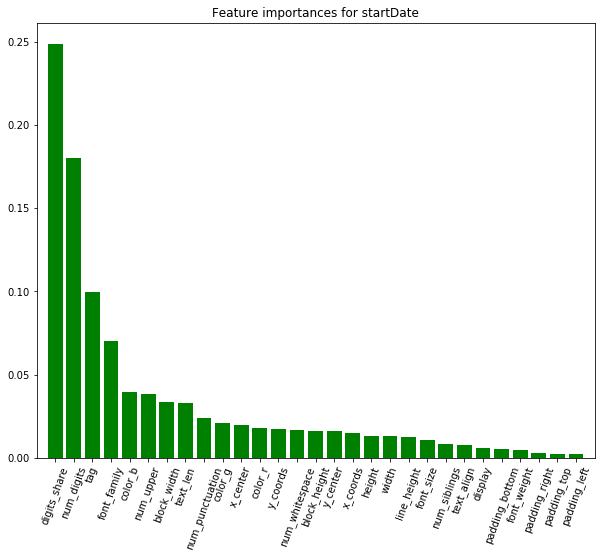

In [9]:
result_date = analyse("startDate", data_num, "Random Forest")

### Description event component


Current model: Random Forest, Prameter optimization: False
1/5 iteration ...
Mean accuracy 0.8494
2/5 iteration ...
Mean accuracy 0.8366
3/5 iteration ...
Mean accuracy 0.8858
4/5 iteration ...
Mean accuracy 0.8660
5/5 iteration ...
Mean accuracy 0.8781
The final CV=5 score for description and Random Forest: 0.8632
METRICS:
   f1_score  mean_accuracy  precision    recall
0  0.873218       0.863202   0.860954  0.895982
Feature importance:
Feature ranking:
1. feature 'block_width' (0.145113)
23. feature 'text_len' (0.089706)
0. feature 'block_height' (0.076340)
9. feature 'font_weight' (0.068447)
7. feature 'font_family' (0.068020)
16. feature 'num_whitespace' (0.054165)
21. feature 'tag' (0.050770)
24. feature 'width' (0.048074)
28. feature 'y_coords' (0.037721)
25. feature 'x_center' (0.034802)
2. feature 'color_b' (0.034218)
5. feature 'digits_share' (0.033676)
26. feature 'x_coords' (0.028168)
11. feature 'line_height' (0.026445)
13. feature 'num_punctuation' (0.021955)
27. feature '

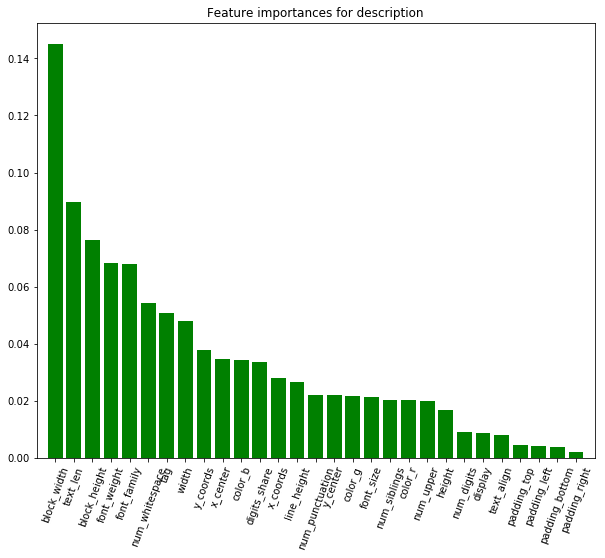

In [10]:
result_descr = analyse("description", data_num, "Random Forest")

# Result for Random forest

In [11]:
result_all_rf = pd.concat([result_name, result_date, result_location, result_descr])
result_all_rf['meta_name'] = ['name', 'date', 'location', 'description']
result_all_rf.ix[:,'model'] = 'Random forest'

In [12]:
result_all_rf.round(4)

,f1_score,mean_accuracy,precision,recall,meta_name,model
0,0.8300,0.8385,0.8401,0.8293,name,Random forest
0,0.9105,0.9076,0.9251,0.8998,date,Random forest
0,0.8337,0.8231,0.8087,0.8697,location,Random forest
0,0.8732,0.8632,0.8610,0.8960,description,Random forest


# Logisitc regression

In [13]:
result_name = analyse("name", data_num, "Logistic regression")
result_date = analyse("startDate", data_num, "Logistic regression")
result_location = analyse("location", data_num, "Logistic regression")
result_descr = analyse("description", data_num, "Logistic regression")

Current model: Logistic regression, Prameter optimization: False
1/5 iteration ...
Mean accuracy 0.7513
2/5 iteration ...
Mean accuracy 0.7150
3/5 iteration ...
Mean accuracy 0.7486
4/5 iteration ...
Mean accuracy 0.7875
5/5 iteration ...
Mean accuracy 0.7214
The final CV=5 score for name and Logistic regression: 0.7448
METRICS:
   f1_score  mean_accuracy  precision    recall
0  0.741858       0.744757   0.757407  0.760931
Feature importance:
Current model: Logistic regression, Prameter optimization: False
1/5 iteration ...
Mean accuracy 0.8522
2/5 iteration ...
Mean accuracy 0.8027
3/5 iteration ...
Mean accuracy 0.8670
4/5 iteration ...
Mean accuracy 0.8650
5/5 iteration ...
Mean accuracy 0.8041
The final CV=5 score for startDate and Logistic regression: 0.8382
METRICS:
   f1_score  mean_accuracy  precision    recall
0  0.837095       0.838213   0.866191  0.820305
Feature importance:
Current model: Logistic regression, Prameter optimization: False
1/5 iteration ...
Mean accuracy 0.74

# Result for Logisitc regression

In [14]:
result_all_lr = pd.concat([result_name, result_date, result_location, result_descr])
result_all_lr['meta_name'] = ['name', 'date', 'location', 'description']
result_all_lr.ix[:,'model'] = 'Logistic regression'
result_all_lr.round(4)

,f1_score,mean_accuracy,precision,recall,meta_name,model
0,0.7419,0.7448,0.7574,0.7609,name,Logistic regression
0,0.8371,0.8382,0.8662,0.8203,date,Logistic regression
0,0.7702,0.7654,0.6999,0.8625,location,Logistic regression
0,0.8513,0.8505,0.8851,0.8300,description,Logistic regression


# SVM

In [15]:
result_name = analyse("name", data_num, "SVM")
result_date = analyse("startDate", data_num, "SVM")
result_location = analyse("location", data_num, "SVM")
result_descr = analyse("description", data_num, "SVM")

Current model: SVM, Prameter optimization: False
1/5 iteration ...
Mean accuracy 0.8384
2/5 iteration ...
Mean accuracy 0.8194
3/5 iteration ...
Mean accuracy 0.7986
4/5 iteration ...
Mean accuracy 0.8122
5/5 iteration ...
Mean accuracy 0.8326
The final CV=5 score for name and SVM: 0.8202
METRICS:
   f1_score  mean_accuracy  precision    recall
0  0.810449       0.820211   0.834751  0.809606
Feature importance:
Current model: SVM, Prameter optimization: False
1/5 iteration ...
Mean accuracy 0.9155
2/5 iteration ...
Mean accuracy 0.8796
3/5 iteration ...
Mean accuracy 0.8644
4/5 iteration ...
Mean accuracy 0.8973
5/5 iteration ...
Mean accuracy 0.8815
The final CV=5 score for startDate and SVM: 0.8877
METRICS:
   f1_score  mean_accuracy  precision    recall
0  0.886361       0.887662   0.879154  0.895453
Feature importance:
Current model: SVM, Prameter optimization: False
1/5 iteration ...
Mean accuracy 0.8268
2/5 iteration ...
Mean accuracy 0.8188
3/5 iteration ...
Mean accuracy 0.8193

# Result for SVM

In [16]:
result_all_svm = pd.concat([result_name, result_date, result_location, result_descr])
result_all_svm['meta_name'] = ['name', 'date', 'location', 'description']
result_all_svm.ix[:,'model'] = 'SVM'
result_all_svm.round(4)

,f1_score,mean_accuracy,precision,recall,meta_name,model
0,0.8104,0.8202,0.8348,0.8096,name,SVM
0,0.8864,0.8877,0.8792,0.8955,date,SVM
0,0.8230,0.8213,0.8435,0.8101,location,SVM
0,0.8558,0.8584,0.8413,0.8731,description,SVM


# Extreme Random Forest

Current model: Extreme Random Forest, Prameter optimization: False
1/5 iteration ...
Mean accuracy 0.8778
2/5 iteration ...
Mean accuracy 0.8599
3/5 iteration ...
Mean accuracy 0.8961
4/5 iteration ...
Mean accuracy 0.8712
5/5 iteration ...
Mean accuracy 0.8514
The final CV=5 score for name and Extreme Random Forest: 0.8713
METRICS:
   f1_score  mean_accuracy  precision    recall
0  0.863951       0.871257   0.846013  0.885261
Feature importance:
Feature ranking:
7. feature 'font_family' (0.151472)
21. feature 'tag' (0.086303)
1. feature 'block_width' (0.055185)
8. feature 'font_size' (0.051955)
27. feature 'y_center' (0.049412)
28. feature 'y_coords' (0.047595)
26. feature 'x_coords' (0.041426)
4. feature 'color_r' (0.035492)
15. feature 'num_upper' (0.035372)
3. feature 'color_g' (0.034441)
23. feature 'text_len' (0.034105)
2. feature 'color_b' (0.032595)
25. feature 'x_center' (0.032037)
16. feature 'num_whitespace' (0.029583)
11. feature 'line_height' (0.028879)
9. feature 'font_we

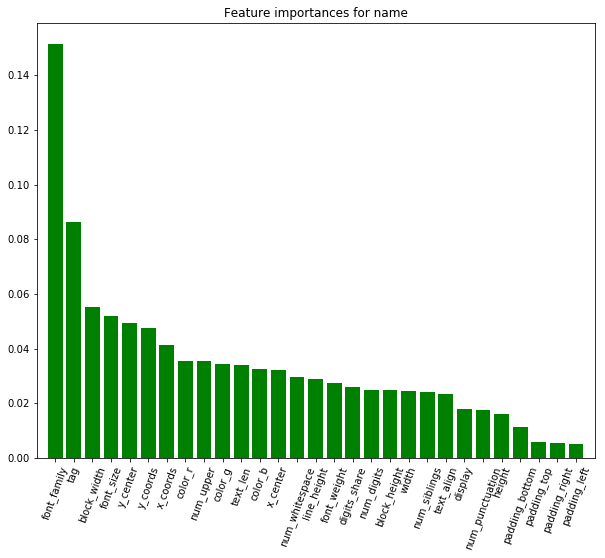

Current model: Extreme Random Forest, Prameter optimization: False
1/5 iteration ...
Mean accuracy 0.8964
2/5 iteration ...
Mean accuracy 0.9017
3/5 iteration ...
Mean accuracy 0.9177
4/5 iteration ...
Mean accuracy 0.9258
5/5 iteration ...
Mean accuracy 0.9136
The final CV=5 score for startDate and Extreme Random Forest: 0.9110
METRICS:
   f1_score  mean_accuracy  precision    recall
0  0.911091       0.911023   0.898774  0.927337
Feature importance:
Feature ranking:
5. feature 'digits_share' (0.215570)
12. feature 'num_digits' (0.188789)
21. feature 'tag' (0.138496)
7. feature 'font_family' (0.054009)
15. feature 'num_upper' (0.034503)
23. feature 'text_len' (0.027842)
2. feature 'color_b' (0.026461)
1. feature 'block_width' (0.023194)
13. feature 'num_punctuation' (0.022860)
3. feature 'color_g' (0.021111)
4. feature 'color_r' (0.020777)
24. feature 'width' (0.018664)
16. feature 'num_whitespace' (0.017717)
22. feature 'text_align' (0.017033)
11. feature 'line_height' (0.016663)
6. 

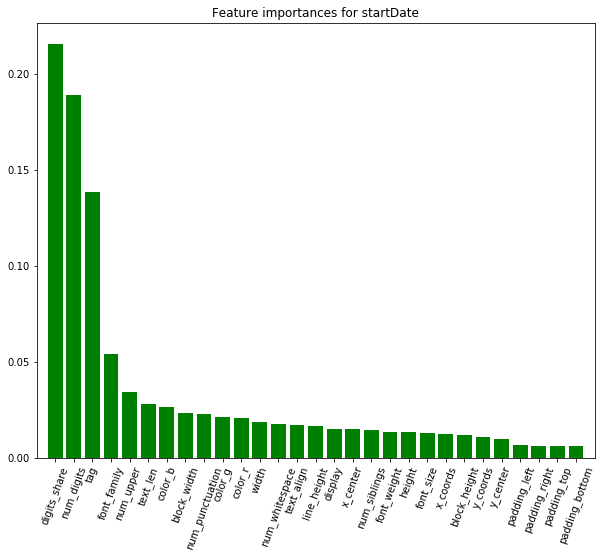

Current model: Extreme Random Forest, Prameter optimization: False
1/5 iteration ...
Mean accuracy 0.8054
2/5 iteration ...
Mean accuracy 0.8491
3/5 iteration ...
Mean accuracy 0.8186
4/5 iteration ...
Mean accuracy 0.8684
5/5 iteration ...
Mean accuracy 0.8698
The final CV=5 score for location and Extreme Random Forest: 0.8423
METRICS:
   f1_score  mean_accuracy  precision    recall
0  0.851848       0.842263   0.788521  0.934456
Feature importance:
Feature ranking:
15. feature 'num_upper' (0.087551)
7. feature 'font_family' (0.082696)
21. feature 'tag' (0.075858)
14. feature 'num_siblings' (0.058194)
9. feature 'font_weight' (0.056378)
23. feature 'text_len' (0.048825)
8. feature 'font_size' (0.048019)
13. feature 'num_punctuation' (0.044399)
5. feature 'digits_share' (0.041720)
2. feature 'color_b' (0.038423)
16. feature 'num_whitespace' (0.036485)
1. feature 'block_width' (0.036367)
11. feature 'line_height' (0.032938)
4. feature 'color_r' (0.029101)
3. feature 'color_g' (0.028390)

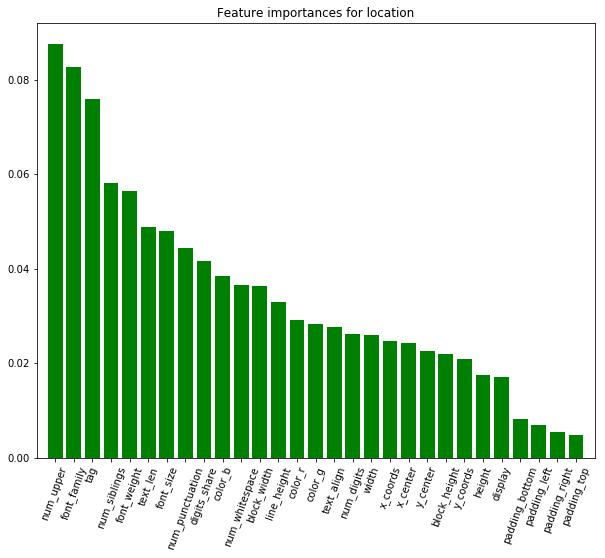

Current model: Extreme Random Forest, Prameter optimization: False
1/5 iteration ...
Mean accuracy 0.8977
2/5 iteration ...
Mean accuracy 0.8858
3/5 iteration ...
Mean accuracy 0.8324
4/5 iteration ...
Mean accuracy 0.8920
5/5 iteration ...
Mean accuracy 0.8784
The final CV=5 score for description and Extreme Random Forest: 0.8773
METRICS:
   f1_score  mean_accuracy  precision    recall
0  0.877982        0.87727   0.863147  0.900253
Feature importance:
Feature ranking:
7. feature 'font_family' (0.108687)
1. feature 'block_width' (0.098902)
0. feature 'block_height' (0.060431)
24. feature 'width' (0.052346)
22. feature 'text_align' (0.045220)
26. feature 'x_coords' (0.043816)
23. feature 'text_len' (0.042153)
21. feature 'tag' (0.039255)
16. feature 'num_whitespace' (0.038146)
13. feature 'num_punctuation' (0.037772)
28. feature 'y_coords' (0.035321)
10. feature 'height' (0.033926)
2. feature 'color_b' (0.033812)
27. feature 'y_center' (0.033315)
5. feature 'digits_share' (0.032389)
9.

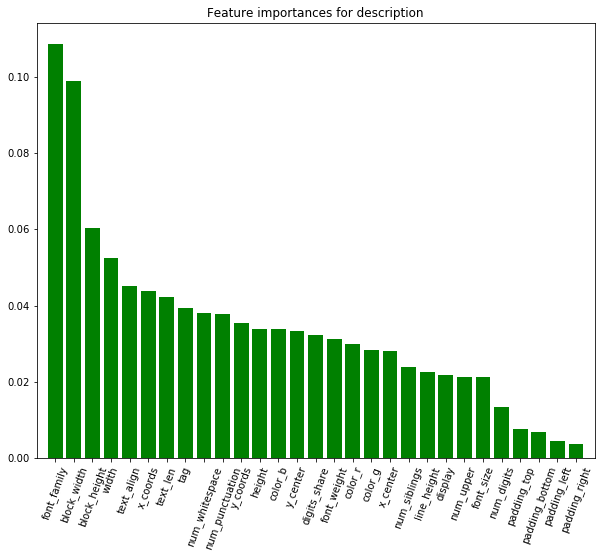

In [17]:
result_name = analyse("name", data_num, "Extreme Random Forest")
result_date = analyse("startDate", data_num, "Extreme Random Forest")
result_location = analyse("location", data_num, "Extreme Random Forest")
result_descr = analyse("description", data_num, "Extreme Random Forest")

# Results for Extreme Random Forest

In [18]:
result_all_erf = pd.concat([result_name, result_date, result_location, result_descr])
result_all_erf['meta_name'] = ['name', 'date', 'location', 'description']
result_all_erf.ix[:,'model'] = 'Extreme Random Forest'
result_all_erf.round(4)

,f1_score,mean_accuracy,precision,recall,meta_name,model
0,0.8640,0.8713,0.8460,0.8853,name,Extreme Random Forest
0,0.9111,0.9110,0.8988,0.9273,date,Extreme Random Forest
0,0.8518,0.8423,0.7885,0.9345,location,Extreme Random Forest
0,0.8780,0.8773,0.8631,0.9003,description,Extreme Random Forest


In [19]:
result_all = pd.concat([result_all_rf, result_all_svm, result_all_lr, result_all_erf])

# Result for all models

In [20]:
result_all = result_all.sort_values(by=['meta_name'],ascending=False).round(4)

In [25]:
result_all.round(2).to_latex(open('summary_result','w'))

In [26]:
result_all

,f1_score,mean_accuracy,precision,recall,meta_name,model
0,0.8300,0.8385,0.8401,0.8293,name,Random forest
0,0.8104,0.8202,0.8348,0.8096,name,SVM
0,0.7419,0.7448,0.7574,0.7609,name,Logistic regression
0,0.8640,0.8713,0.8460,0.8853,name,Extreme Random Forest
0,0.8337,0.8231,0.8087,0.8697,location,Random forest
0,0.8230,0.8213,0.8435,0.8101,location,SVM
0,0.7702,0.7654,0.6999,0.8625,location,Logistic regression
0,0.8518,0.8423,0.7885,0.9345,location,Extreme Random Forest
0,0.8732,0.8632,0.8610,0.8960,description,Random forest
0,0.8558,0.8584,0.8413,0.8731,description,SVM


Here we used:
* Numerica features
* Fair splitting
* Cross validation k = 5

# Importance from XGBoost 

In [9]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt

In [19]:
def my_plot_importance(booster, figsize, **kwargs): 
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

In [20]:
def draw_xfboost_importance(data, field):
    X_train, X_test, y_train, y_test = get_splits_component(field_name=field, data=data_num)
    gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
    gbm.fit(X_train, y_train)
    my_plot_importance(gbm, figsize=(10,8), title='Feature importance for {}'.format(field))

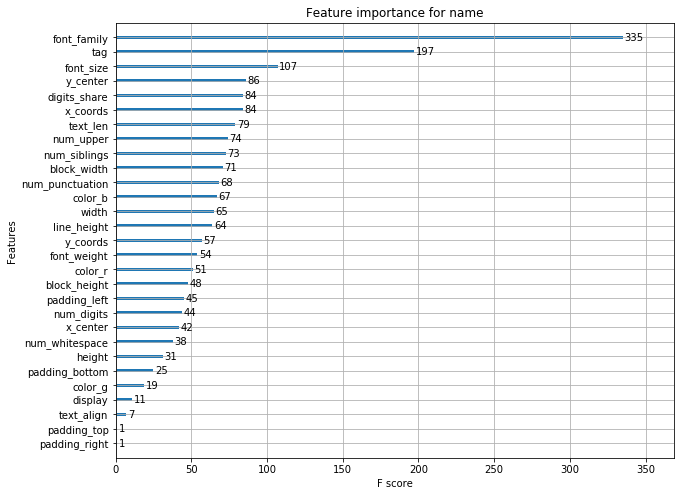

In [21]:
draw_xfboost_importance(data_num, 'name')

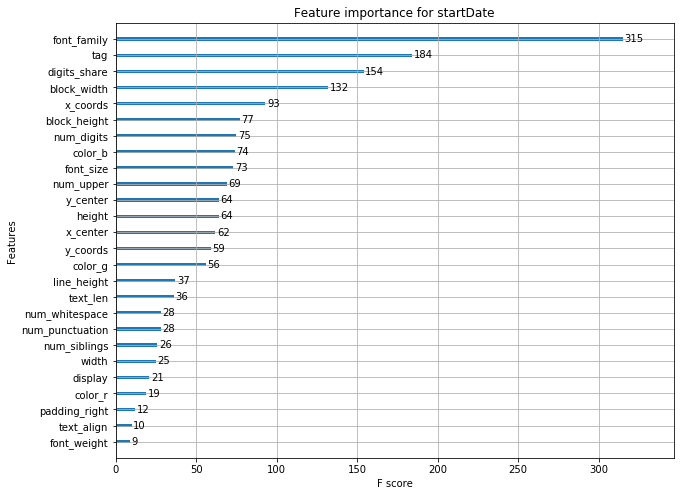

In [22]:
draw_xfboost_importance(data_num, 'startDate')

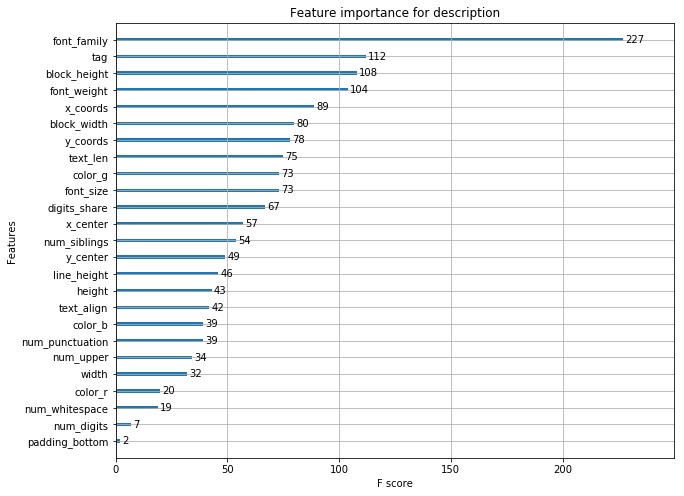

In [23]:
draw_xfboost_importance(data_num, 'description')

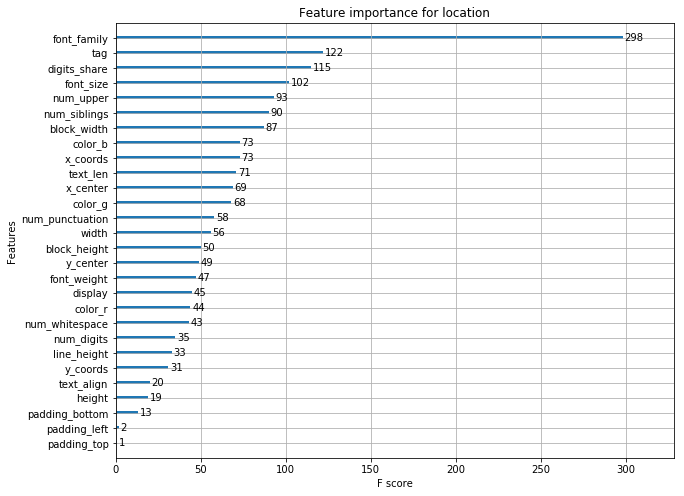

In [24]:
draw_xfboost_importance(data_num, 'location')